In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("advertising.csv")

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:

print("DataFrame Info:")
df.info()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


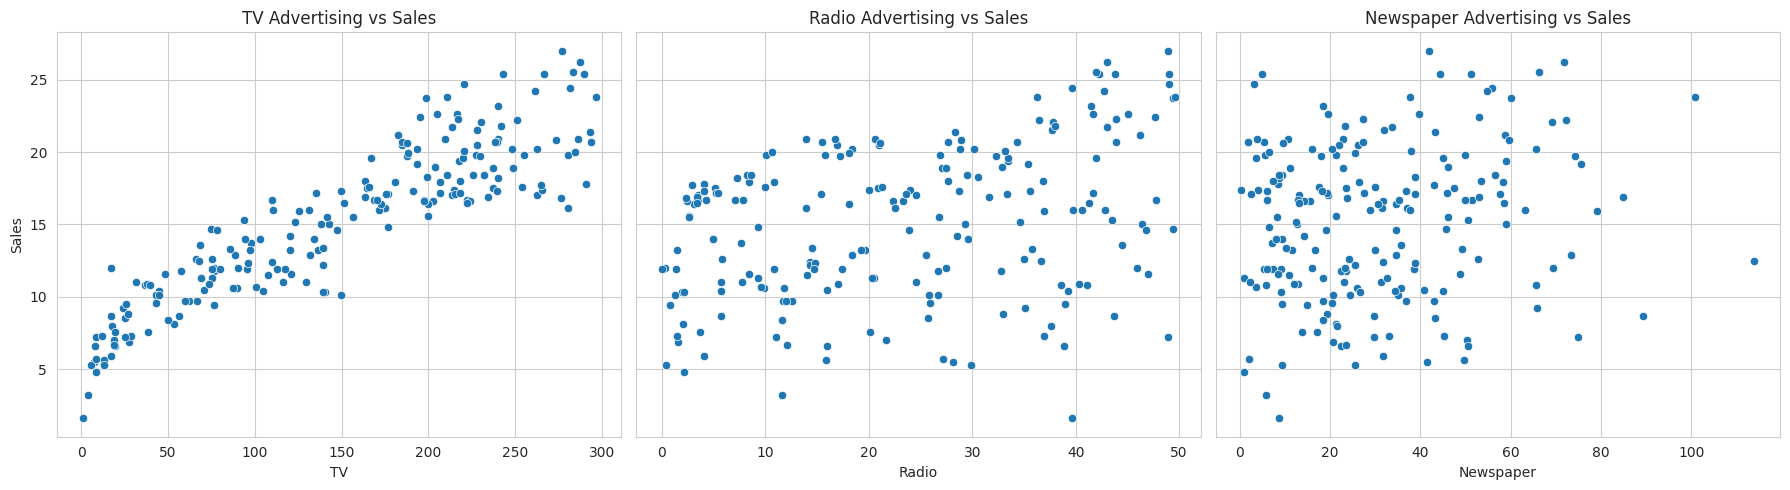

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.scatterplot(x='TV', y='Sales', data=df, ax=axes[0])
axes[0].set_title('TV Advertising vs Sales')

sns.scatterplot(x='Radio', y='Sales', data=df, ax=axes[1])
axes[1].set_title('Radio Advertising vs Sales')

sns.scatterplot(x='Newspaper', y='Sales', data=df, ax=axes[2])
axes[2].set_title('Newspaper Advertising vs Sales')

plt.tight_layout()
plt.show()


Correlation Matrix:


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


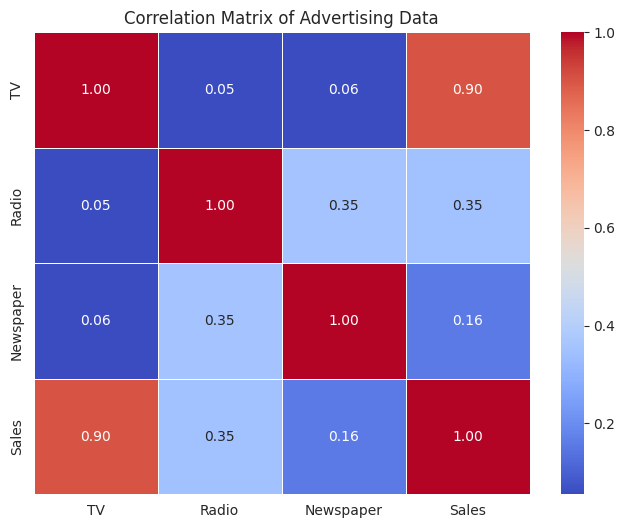

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Advertising Data')
plt.show()

In [ ]:
# Histogram for each numerical column
df.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


In [ ]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [ ]:
sns.pairplot(df)
plt.suptitle("Pairplot of All Features", y=1.02)
plt.show()


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:\n", outliers)


In [ ]:
# Save cleaned version if needed
df.to_csv("cleaned_advertising.csv", index=False)
